In [3]:
import pandas as pd
%matplotlib inline

In [4]:
compras_df = pd.read_csv('/content/clean_compras.csv')

In [5]:
compras_df.head(5)

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS VARIOS
1,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS VARIOS
2,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS VARIOS
3,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS VARIOS
4,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS VARIOS


#Vision general del dataset


In [6]:
compras_df.columns

Index(['NUM BEN', 'BENEFICIARIO', 'RFC', 'FACTURA', 'CONTRATO', 'CONCEPTO',
       'TIPO', '# OP', 'FECHA', 'IMPORTE', 'SHEET'],
      dtype='object')

In [7]:
compras_df.dtypes

NUM BEN           int64
BENEFICIARIO     object
RFC              object
FACTURA          object
CONTRATO         object
CONCEPTO         object
TIPO             object
# OP            float64
FECHA            object
IMPORTE         float64
SHEET            object
dtype: object

In [8]:
compras_df.describe()

,NUM BEN,# OP,IMPORTE
count,1540.000000,1.540000e+03,1.540000e+03
mean,203914.777273,1.920050e+08,6.263179e+05
std,92435.932025,1.411189e+08,4.666912e+06
min,110152.000000,1.019042e+06,8.600000e-01
25%,116223.000000,1.019144e+06,2.987000e+03
50%,203013.000000,2.980000e+08,1.235584e+04
75%,311250.000000,3.000001e+08,1.130583e+05
max,370012.000000,6.040001e+08,1.267303e+08


In [9]:
compras_df = compras_df[['BENEFICIARIO', 'FACTURA', 'CONTRATO', 'CONCEPTO', 'TIPO', '# OP', 'FECHA', 'IMPORTE', 'SHEET' ]]

# Analisis unidimensional de las variables

In [10]:
compras_df['SHEET'].value_counts()

CONTRATISTAS Y FDO FED    724
GASTOS VARIOS             690
COMUNICACION               71
SERV. PERS.                46
SERV PPROF                  9
Name: SHEET, dtype: int64

In [11]:
len(compras_df['CONCEPTO'].unique())

1396

## Cuantas facturas a realizado cada Proveedor


In [12]:
compras_df['BENEFICIARIO'].value_counts()[0:10]

CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION    266
AUTOKAM REGIOMONTANA,S.A.DE C.V.                      101
CAR ONE MONTERREY, S.A. DE C.V.                        78
PEREZ RIOS RAMIRO                                      58
S.I.M.E.P.R.O.D.E.                                     50
INTERASFALTOS, S.A. DE C.V.                            45
GRUPO COYOTE MONTERREY, S.A. DE C.V.                   43
SERVICIO TECNICO CHURUBUSCO, S.A. DE C.V.              30
CFE SUMINISTRADOR DE SERVICIOS BASICOS                 29
CORDERO MACIAS SILVESTRE GUADALUPE                     27
Name: BENEFICIARIO, dtype: int64

<Axes: >

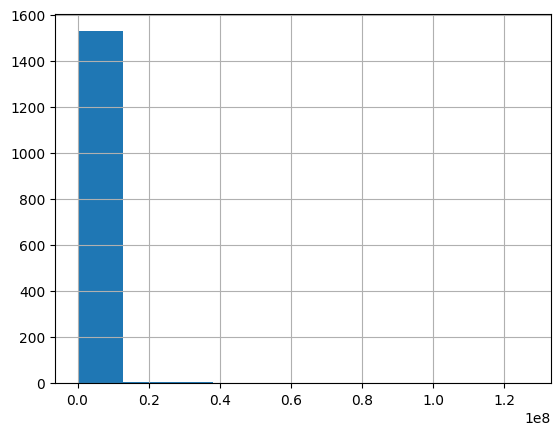

In [13]:
compras_df['IMPORTE'].hist()

<Axes: >

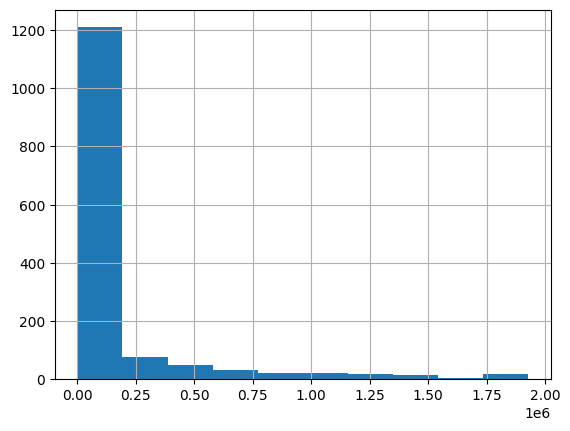

In [14]:
compras_df[compras_df['IMPORTE']< compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist()

<Axes: >

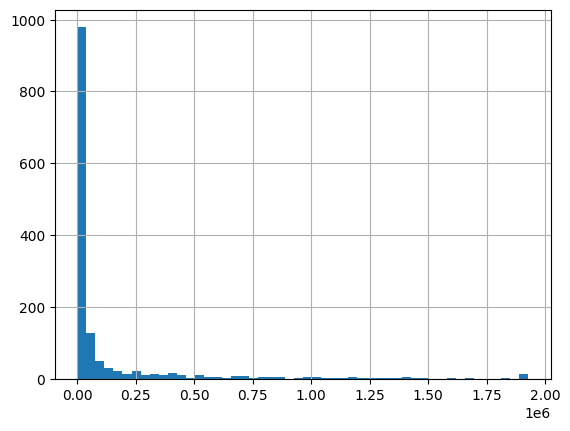

In [15]:
compras_df[compras_df['IMPORTE']< compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=50)

In [16]:
compras_df[compras_df['IMPORTE']< compras_df['IMPORTE'].quantile(0.95)].head(5)

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS VARIOS
1,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS VARIOS
2,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS VARIOS
3,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS VARIOS
4,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS VARIOS


# Analisis multidimensional de las variables

In [17]:
sum_importe_beneficiario = compras_df.groupby('BENEFICIARIO').sum()['IMPORTE']
sum_importe_beneficiario 

<ipython-input-17-c237b1349587>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_importe_beneficiario = compras_df.groupby('BENEFICIARIO').sum()['IMPORTE']


BENEFICIARIO
235 PROYECTOS, S.A. DE C.V.                   1649292.36
ABC Y CONSTRUCCIONES, SA. DE CV.              1311087.90
ACEROS Y OVEROLLINGS DE MEXICO, SA. DE CV.       5914.30
ADQUISICIONES INTELIGENTES, S.A. DE C.V.      2132196.00
ALIANZA AUTOMOTRIZ RIVERO, SA. DE CV.          450859.52
                                                 ...    
VILLARREAL CARDENAS JUAN IGNACIO                 3733.13
VILLARREAL CARDENAS NANCY ESTHER                81461.14
VILLARREAL DE LEON BERTHA                       11004.05
VIVERO EL ESCORIAL, S.A. DE C.V.              2511255.46
ZAPATA CHAVIRA HOMERO ARTURO                    28350.00
Name: IMPORTE, Length: 301, dtype: float64

<Axes: xlabel='BENEFICIARIO'>

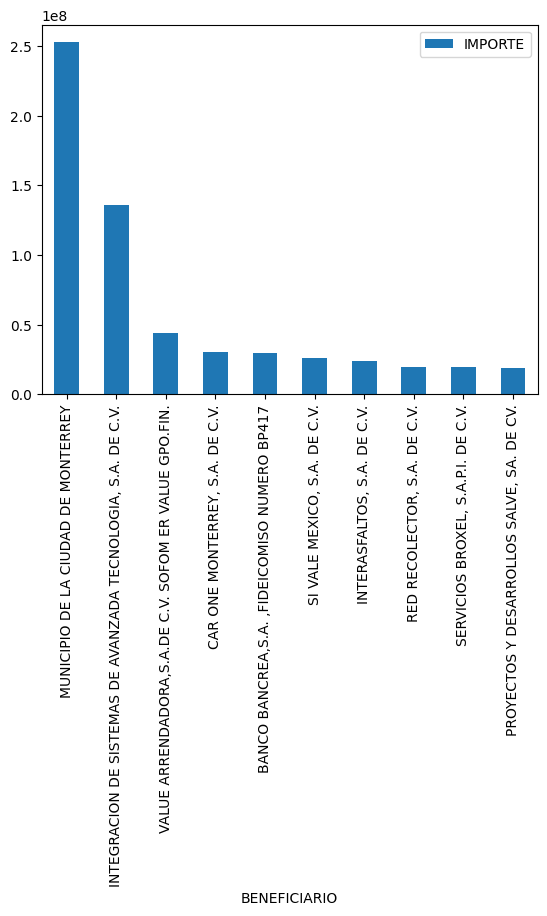

In [18]:
sum_importe_beneficiario.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='BENEFICIARIO', y='IMPORTE')

# Gasto promedio por hoja

In [19]:
mean_importe_sheet= compras_df.groupby('SHEET').mean()['IMPORTE']

<ipython-input-19-1e5c23a4189d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_importe_sheet= compras_df.groupby('SHEET').mean()['IMPORTE']


<Axes: xlabel='SHEET'>

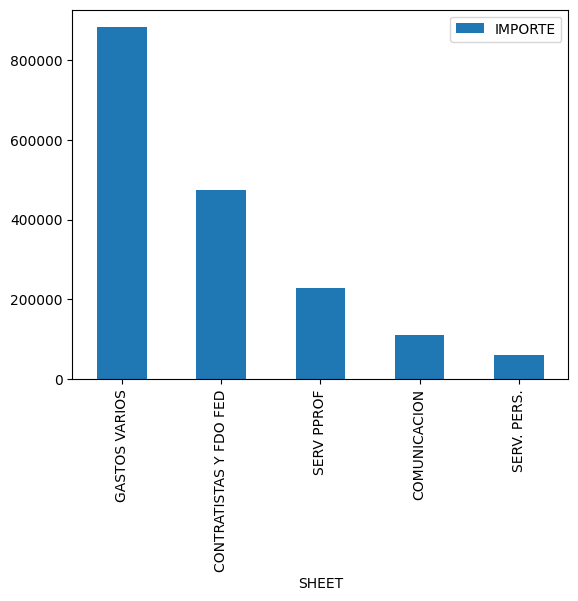

In [20]:
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='SHEET', y='IMPORTE')

# Tipo de gastos y sus volumenes

In [21]:
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10]

,SHEET,IMPORTE
2,GASTOS VARIOS,881659.731797
1,CONTRATISTAS Y FDO FED,474566.765787
3,SERV PPROF,229592.166667
0,COMUNICACION,109705.343662
4,SERV. PERS.,59623.405217


In [22]:
sum_importe_fecha = compras_df.groupby('FECHA').sum()['IMPORTE']
sum_importe_fecha

<ipython-input-22-3ce8700fd606>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_importe_fecha = compras_df.groupby('FECHA').sum()['IMPORTE']


FECHA
2020-12-01    2.453181e+04
2020-12-02    3.000000e+04
2020-12-03    1.313241e+05
2020-12-04    7.432247e+07
2020-12-07    1.815018e+06
2020-12-08    1.519824e+08
2020-12-09    4.659596e+05
2020-12-10    1.207010e+06
2020-12-11    1.127524e+08
2020-12-14    3.692338e+05
2020-12-15    1.826510e+04
2020-12-16    2.504067e+06
2020-12-17    1.735205e+08
2020-12-18    1.568875e+08
2020-12-21    9.441760e+05
2020-12-22    6.814845e+07
2020-12-23    3.328571e+07
2020-12-28    1.204764e+08
2020-12-29    2.050000e+05
2020-12-30    6.435889e+07
2020-12-31    1.080281e+06
Name: IMPORTE, dtype: float64

# Aplicando filtros

In [23]:
compras_gastos_df = compras_df[compras_df['SHEET'] == 'GASTOS VARIOS']
compras_gastos_df.head(5)

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS VARIOS
1,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS VARIOS
2,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS VARIOS
3,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS VARIOS
4,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS VARIOS


<Axes: >

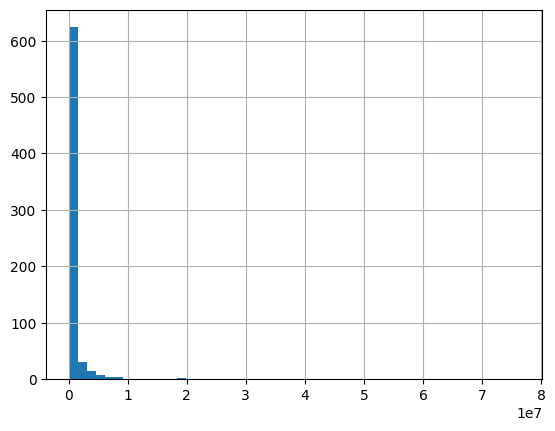

In [24]:
compras_gastos_df['IMPORTE'].hist(bins=50)

## Gastos de la ciudad de Monterrey

In [25]:
compras_gastos_df[compras_gastos_df['BENEFICIARIO'] == 'MUNICIPIO DE LA CIUDAD DE MONTERREY']

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
367,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-A-158004-1734,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCA ...",TR,11000196.0,2020-12-17,73864368.92,GASTOS VARIOS
368,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-B-158004-1735,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,231000103.0,2020-12-17,76352493.81,GASTOS VARIOS
369,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-C-158004-1733,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,240000108.0,2020-12-17,19246138.70,GASTOS VARIOS
370,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-A-158004-1760,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCA ...",TR,11000197.0,2020-12-28,36101891.39,GASTOS VARIOS
371,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-A-158004-1780,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,11000198.0,2020-12-28,27443.46,GASTOS VARIOS
372,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-B-158004-1761,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,231000104.0,2020-12-28,33579364.01,GASTOS VARIOS
373,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-B-158004-1781,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,231000105.0,2020-12-28,132688.02,GASTOS VARIOS
374,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-C-158004-1759,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,240000109.0,2020-12-28,13362855.08,GASTOS VARIOS
375,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-C-158004-1779,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,240000110.0,2020-12-28,17925.96,GASTOS VARIOS
376,MUNICIPIO DE LA CIUDAD DE MONTERREY,158002-470,NO APLICA,FINIQUITO DE FONDO OPERATIVO DE LA SECRETARÍA ...,CH,299000198.0,2020-12-30,1439.20,GASTOS VARIOS


In [26]:
compras_df[compras_df['BENEFICIARIO'] == 'MUNICIPIO DE LA CIUDAD DE MONTERREY']['SHEET'].value_counts()

GASTOS VARIOS             11
CONTRATISTAS Y FDO FED     5
Name: SHEET, dtype: int64

# Filtrar con dos variables a la vez

In [27]:
compras_sheet_beneficiario = compras_df.groupby(['BENEFICIARIO', 'SHEET']).sum()['IMPORTE'].sort_values().unstack('SHEET')

<ipython-input-27-ae749c698a3c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  compras_sheet_beneficiario = compras_df.groupby(['BENEFICIARIO', 'SHEET']).sum()['IMPORTE'].sort_values().unstack('SHEET')


In [28]:
top_beneficiarios = compras_df.groupby('BENEFICIARIO')['IMPORTE'].sum().sort_values(ascending=False).index[0:10]

In [29]:
compras_sheet_beneficiario .loc[top_beneficiarios]

SHEET,COMUNICACION,CONTRATISTAS Y FDO FED,GASTOS VARIOS,SERV PPROF,SERV. PERS.
BENEFICIARIO,,,,,
MUNICIPIO DE LA CIUDAD DE MONTERREY,NaN,3.412500e+04,2.526895e+08,NaN,NaN
"INTEGRACION DE SISTEMAS DE AVANZADA TECNOLOGIA, S.A. DE C.V.",NaN,1.281179e+08,7.493040e+06,NaN,NaN
"VALUE ARRENDADORA,S.A.DE C.V. SOFOM ER VALUE GPO.FIN.",NaN,NaN,4.382056e+07,NaN,NaN
"CAR ONE MONTERREY, S.A. DE C.V.",NaN,2.229764e+07,8.346672e+06,NaN,NaN
"BANCO BANCREA,S.A. ,FIDEICOMISO NUMERO BP417",NaN,NaN,3.000000e+07,NaN,NaN
"SI VALE MEXICO, S.A. DE C.V.",NaN,NaN,2.600384e+07,NaN,NaN
"INTERASFALTOS, S.A. DE C.V.",NaN,NaN,2.404647e+07,NaN,NaN
"RED RECOLECTOR, S.A. DE C.V.",NaN,1.951267e+07,NaN,NaN,NaN
"SERVICIOS BROXEL, S.A.P.I. DE C.V.",NaN,NaN,1.941272e+07,NaN,NaN


<Axes: xlabel='BENEFICIARIO'>

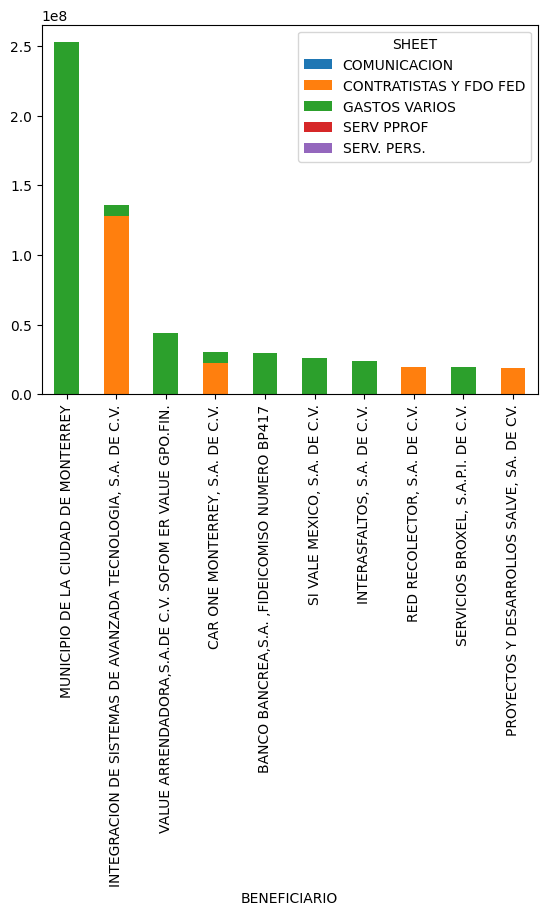

In [30]:
compras_sheet_beneficiario .loc[top_beneficiarios].plot.bar(stacked=True)

# Analisis de texto

In [32]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import nltk 
nltk.download('book')
from nltk.book import *
from nltk.corpus import stopwords

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

In [37]:
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [41]:
textos_compras = ''
for row in compras_df['CONCEPTO']: 
  textos_compras = textos_compras + '' + row

In [43]:
stopwords_list = stopwords.words('spanish') + ['2020', 'cont', 'millar', 'dpp', 'est', 'op', 'ret', 'mty', 'icom']

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [51]:
textos_compras = ' '.join([x for x in textos_compras.strip().lower().split(' ')if x not in stopwords_list and len(x)>4])

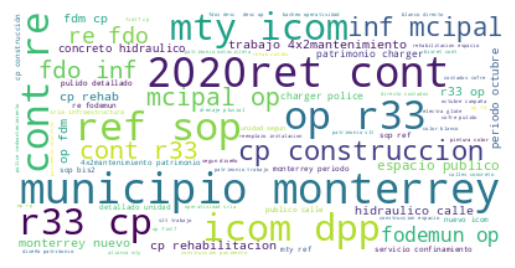

In [52]:
wc = WordCloud(background_color='white')
wc.generate(textos_compras)

plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()